<a href="https://colab.research.google.com/github/K-J-HYEON/good/blob/add-input-method/18_RNN1_Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.
# 텐서플로우 1.x 버전 코드 돌릴때
# !pip install -q tensorflow-gpu==1.15.0
# %tensorflow_version 1.x


2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
Epoch 1/20
90/90 [==============================] - 10s 22ms/step - loss: 2.9665 - accuracy: 0.3179 - val_loss: 2.1698 - val_accuracy: 0.4488
Epoch 2/20
90/90 [==============================] - 1s 12ms/step - loss: 2.0567 - accuracy: 0.4787 - val_loss: 1.9571 - val_accuracy: 0.5067
Epoch 3/20
90/90 [==============================] - 1s 12ms/step - loss: 1.9226 - accuracy: 0.5094 - val_loss: 1.8247 - val_accuracy: 0.5276
Epoch 4/20
90/90 [==============================] - 1s 13ms/step - loss: 1.7706 - accuracy: 0.5371 - val_loss: 1.7606 - val_accuracy: 0.5534
Epoch 5/20
90/90 [==============================]

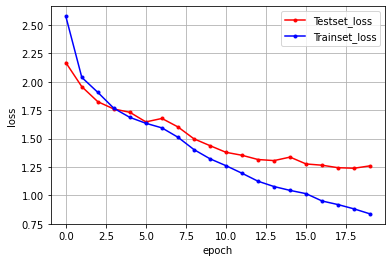

In [ ]:


# %%time #시간 얼마나 걸리는지 돌려봐라
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 로이터 뉴스 데이터셋 불러오기
from keras.datasets import reuters #케라스에서 로이터를 가져오겠다.
from keras.models import Sequential #반드시 Dense층이 나온다.
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense,LSTM,Embedding
from keras.layers import Dense, LSTM, Embedding #엠비딩 기법 이용해서 LSTM 사용한다.
from keras.preprocessing import sequence
from keras.utils import np_utils



# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 불러온 데이터를 학습셋, 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2) #reuter.load_data() 함수를 이용해서 기사를 불러오고
#test_split 인자를 통해서 20%를 테스트셋으로 사용했다. num_words라는 인자는 =1000이니까 1~1000에 해당하는 단어만 선택해서 불러오는 것이다.


# 데이터 확인하기
category = numpy.max(Y_train) + 1  #numpy.max() 함수로 Y_train의 종류를 구하니 46개의 카테고리로 구분되어 있음을 알 수 있고
#전체길이가 처음은 0으로 시작한다.(그래서 1을 더함) / (bos(~sentence)때문에?)

print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0]) # print(X_train[0])으로 기사를 출력해 보니 단어가 나오는게 아니라, [1, 2, ~]같은 숫자가 나온다. 
# 즉, 데이터 안에서 해당 단어가 몇 번이나 나타나는지 세어 빈도!!!에 따라 번호를 붙였다.(3이면 세 번째로 빈도가 높은 단어라는 뜻)


# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100) # 각 기사의 단어 수가 제 각각 다르므로 이를 동일하게 맞춰야 한다.
#이때는 다음과 같이 데이터 전처리 함수 sequence()를 이용한다.
#100개 이상이면 버리고 100개 미만이면 값을 취하겠다.(100에서 모자랄 때는 모자라는 부분을 모두 0으로 채운다.) #maxlen = 100

x_test = sequence.pad_sequences(X_test, maxlen=100)

y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)
#y데이터에 원-핫 인코딩 처리를 해서 데이터 전처리 과정을 마친다.





# 모델의 설정
model = Sequential() #Embedding층과 LSTM 층이 추가되었는데 
# Embedding 층은 데이터 전처리 과정을 통해 입력된 값을 받아 다음 층이 알아들을 수 있는 형태로 변환하는 역할 
model.add(Embedding(1000, 100)) #1000개의 단어를 가져와서 100개만 len값을 가져가고
# Embedding('불러온 단어의 총 개수', '기사당 단어 수')형식=>model 설정 부분의 맨 처음에 위치해야한다.

model.add(LSTM(100, activation='tanh')) #임배딩(~,100) = LSTM(100, ~) 숫자맞춰준다.
# LSTM(Long Short Term Memory)은 RNN(순환신경망)에서 기억 값에 대한 가중치를 제어하며, LSTM(기사당 단어 수, 기타 옵션)의 형식으로 적용 = > 활성화함수로는 탄젠트함수 쓴다.


model.add(Dense(46, activation='softmax'))

# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',   #= > fine-tuning
            metrics=['accuracy'])


# 모델의 실행 (모델 구축 : 학습 데이터 셋)
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))
# .fit(train데이터이다)

# 테스트 정확도 출력 (모델 평가는 test set!!)
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))
#.evaluate(test데이터이다.)

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']


# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')


# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# test accuracy가 낮다 = > 다시 짜야한다.